# Optimal expression to find

$$Y = (X_1 - X_2) / (X_3 - X_4)$$

# Import packages

In [1]:
from atgfe.GeneticFeatureEngineer import GeneticFeatureEngineer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.regressor import ResidualsPlot, PredictionError
from lightgbm import LGBMRegressor

In [2]:
df = pd.read_csv('./data/generated_2.csv')
df.head()

,X1,X2,X3,X4,Y
0,833,1888,409,21,-2.719072
1,4439,4523,485,223,-0.320611
2,2758,2540,456,143,0.696486
3,2316,1854,500,180,1.443750
4,1540,2550,409,468,17.118644


In [3]:
target = 'Y'
columns = df.drop(target, axis=1).columns.tolist()

In [4]:
X = df.drop(target, axis=1).copy()
Y = df.loc[:, target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

In [5]:
def display_residual_plot(model):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()                 

In [6]:
def prediction_error_plot(model):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()     

In [7]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [8]:
def score_model(model, X, y):
    evaluation_metric_scorer = make_scorer(rmse, greater_is_better=True)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=evaluation_metric_scorer, n_jobs=-1)
    scores_mean = scores.mean()
    score_std = scores.std()
    print('Mean of metric: {}, std: {}'.format(scores_mean, score_std))

In [9]:
def create_new_model():
    return make_pipeline(StandardScaler(), LinearRegression())

# Using LightGBM

In [10]:
lgbm_model = LGBMRegressor(random_state=7)

In [11]:
score_model(lgbm_model, X, Y)

Mean of metric: 150.64248826152397, std: 65.20853946472674


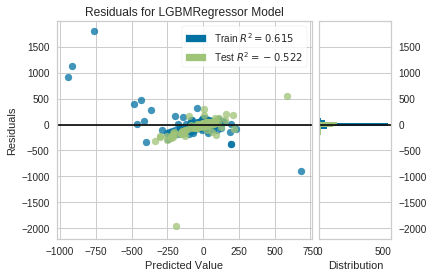

In [12]:
display_residual_plot(lgbm_model)

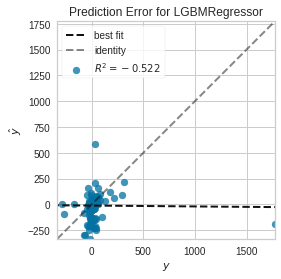

In [13]:
prediction_error_plot(lgbm_model)

# Using Linear Regression

In [14]:
model = create_new_model()

In [15]:
score_model(model, X, Y)

Mean of metric: 141.2618292515843, std: 71.71828825285208


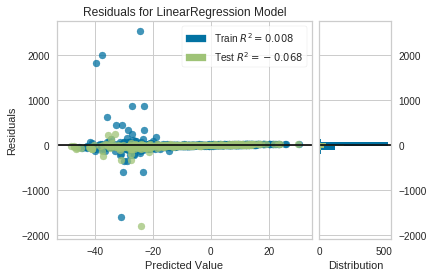

In [16]:
display_residual_plot(model)

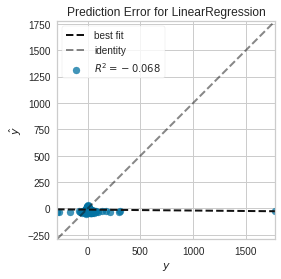

In [17]:
prediction_error_plot(model)

# Using ATgfe

In [18]:
gfe = GeneticFeatureEngineer(model, x_train=X_train, y_train=y_train, numerical_features=columns,
                             number_of_candidate_features=1,
                             number_of_interacting_features=4,
                             evaluation_metric=rmse, fit_wo_original_columns=True,
                             shuffle_training_data_every_generation=True, n_jobs=16)

2019-11-26 22:37:26,245:INFO: New Engineer created with the following parameters: 
2019-11-26 22:37:26,246:INFO: 
Model type: <class 'sklearn.pipeline.Pipeline'>
Numerical Features: ['X1', 'X2', 'X3', 'X4']
Number of candidate features: 1
Number of interacting features: 4
Evaluation Metric: rmse
Minimize metric is True 


In [19]:
gfe.fit(mu=5000, lambda_=5200, early_stopping_patience=10, mutation_probability=0.5, crossover_probability=0.5)

Start of evolution
   	      	                                                            fitness                                                            
   	      	-------------------------------------------------------------------------------------------------------------------------------
gen	nevals	avg        	best_ind_in_gen_val_score	best_val_score	gen	max  	min    	nevals	std        	time_in_seconds
0  	5000  	1.21704e+10	nan                      	nan           	0  	1e+11	181.424	5000  	3.23742e+10	nan            
1  	5200  	154.202    	136.315                  	136.315       	1  	154.56	127.039	5200  	2.02196    	1.56228        
2  	5200  	178.931    	132.04                   	132.04        	2  	180.101	166.15 	5200  	2.71896    	1.53612        
3  	5200  	146.962    	132.04                   	132.04        	3  	148.839	5.10112e-14	5200  	9.80675    	1.62031        
4  	5200  	179.895    	9.1722e-14               	9.1722e-14    	4  	185.51 	1.77096e-13	5200  	31.1996    	1.

# Use ATgfe

# Apply GFE

In [20]:
X = gfe.transform(X)

In [21]:
X.head(20)

,X1,X2,X3,X4,(X1 - X2)/(-X3 + X4)
0,833,1888,409,21,2.719072
1,4439,4523,485,223,0.320611
2,2758,2540,456,143,-0.696486
3,2316,1854,500,180,-1.443750
4,1540,2550,409,468,-17.118644
5,1931,2306,436,92,1.090116
6,707,4944,447,370,55.025974
7,2487,1459,475,320,-6.632258
8,1557,2779,447,370,15.870130
9,3913,1915,443,408,-57.085714


In [22]:
model = create_new_model()

In [23]:
score_model(model, X, Y)

Mean of metric: 1.3390124513276298e-13, std: 5.545854458164717e-14


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

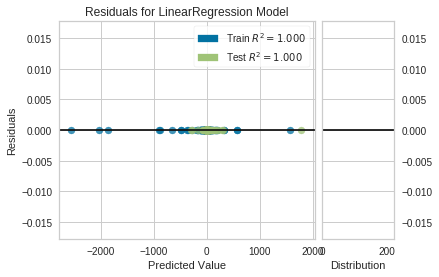

In [25]:
display_residual_plot(model)

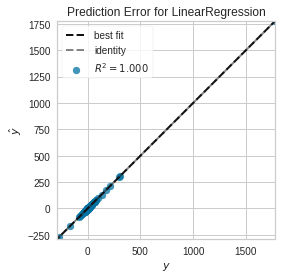

In [26]:
prediction_error_plot(model)